# Opdracht 3 - MPG dataset

In [1]:
import pandas as pd
import seaborn as sns

In [8]:
df = sns.load_dataset('mpg')

# of

df = pd.read_csv('../datasets/mpg.csv')

In [10]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   mpg              398 non-null    float64 
 1   cylinders        398 non-null    int64   
 2   displacement     398 non-null    float64 
 3   horsepower       392 non-null    float64 
 4   weight           398 non-null    int64   
 5   acceleration     398 non-null    float64 
 6   model_year       398 non-null    int64   
 7   origin           398 non-null    category
 8   name             398 non-null    object  
 9   make             398 non-null    object  
 10  model            396 non-null    object  
 11  weight_category  397 non-null    category
dtypes: category(2), float64(4), int64(3), object(3)
memory usage: 32.3+ KB


In [54]:
df['origin'] = df['origin'].astype('category')

In [66]:
df['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [80]:
df = df.drop(index=[2,4,6])

In [84]:
df.loc[[384, 385], ['name', 'origin']]

name origin
384    honda civic  japan
385  datsun 310 gx  japan

<Axes: >

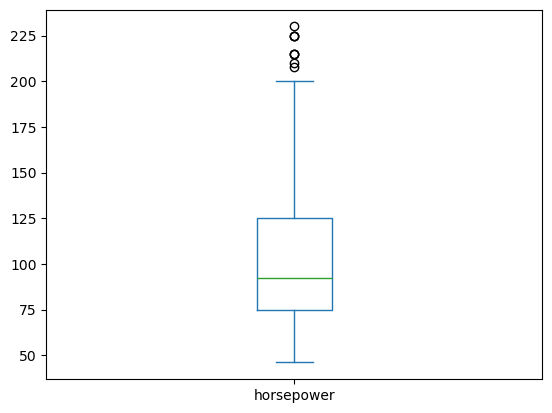

In [92]:
df['horsepower'].plot(kind='box')

In [83]:
df.at[384, 'name'] = 'honda civic'

In [12]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

<Axes: ylabel='origin'>

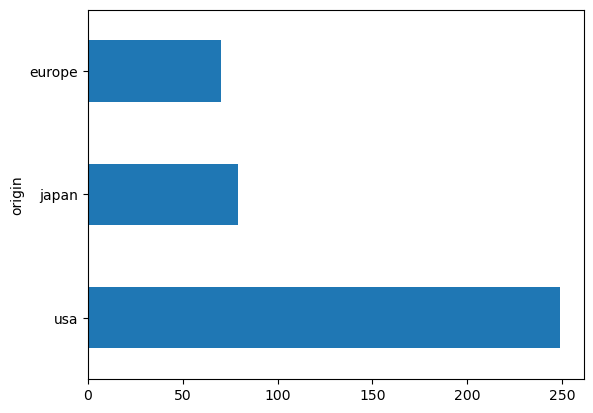

In [18]:
df['origin'].value_counts().plot(kind='barh')

In [32]:
df[['make', 'model']] = df['name'].str.split(n=1, expand=True)

In [33]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name       make            model  
0            70     usa  chevrolet chevelle malibu  chevrolet  chevelle malibu  
1            70     usa          buick skylark 320      buick      skylark 320  
2            70     usa         plymouth satellite   plymouth        satellite  
3            70     usa              amc rebel sst        amc        rebel sst  
4            70     usa                ford torino       ford           torino  
..          ...     ...                        ...        ...              ...  
393          82     usa            ford mustang gl       ford       mustang gl  
394          82  europe                  vw pickup         vw           pickup  
395          82     usa              dodge rampage      dodge          rampage  
396          82     usa                ford ranger       ford           ranger  
397          82     usa                 chevy s-10      chevy             s-10  

[398 rows x 11 columns]

In [93]:
df['make'].value_counts().sort_index()

make
amc           28
audi           7
bmw            2
buick         17
cadillac       2
chevrolet     46
chrysler       6
datsun        23
dodge         28
fiat           8
ford          51
hi             1
honda         13
mazda         12
mercedes       3
mercury       11
nissan         1
oldsmobile    10
opel           4
peugeot        8
plymouth      30
pontiac       16
renault        5
saab           4
subaru         4
toyota        26
triumph        1
volkswagen    22
volvo          6
Name: count, dtype: int64

In [35]:
fix_typos = {
    'capri': 'ford',
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'maxda': 'mazda',
    'mercedes-benz': 'mercedes',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['make'] = df['make'].replace(fix_typos)

In [38]:
df['make'].value_counts()

make
ford          52
chevrolet     47
plymouth      31
amc           28
dodge         28
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
renault        5
subaru         4
opel           4
saab           4
mercedes       3
bmw            2
cadillac       2
triumph        1
hi             1
nissan         1
Name: count, dtype: int64

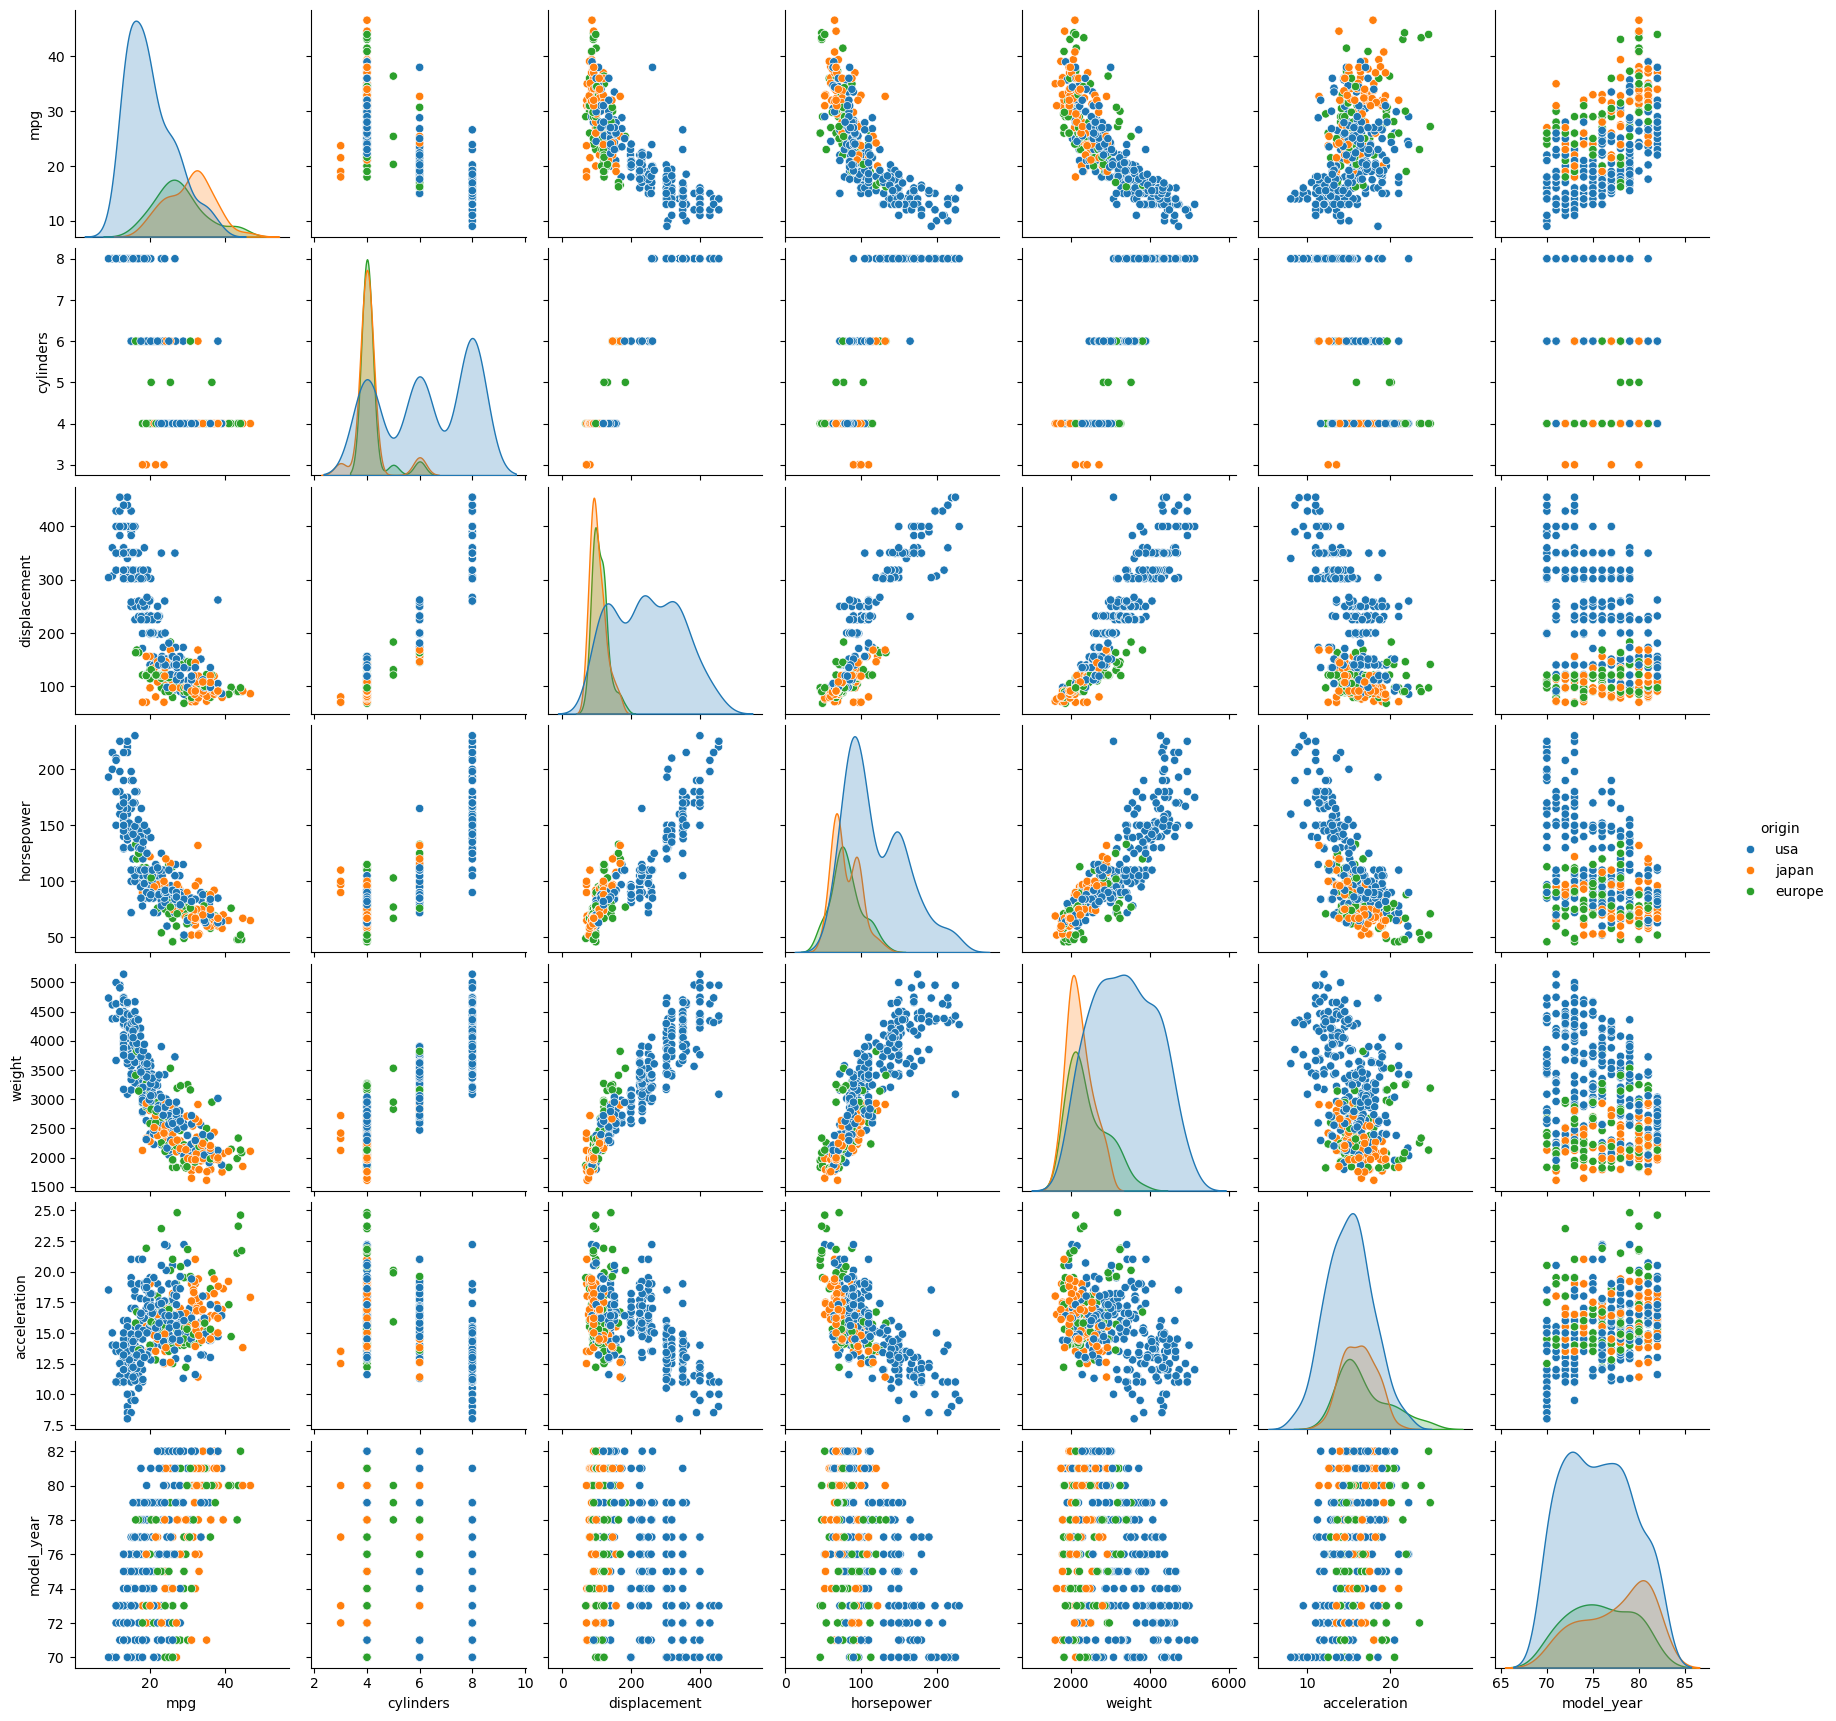

In [39]:
sns.pairplot(data=df, hue='origin')

In [40]:
df.sort_values('mpg').head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
28    9.0          8         304.0       193.0    4732          18.5   
25   10.0          8         360.0       215.0    4615          14.0   
26   10.0          8         307.0       200.0    4376          15.0   
103  11.0          8         400.0       150.0    4997          14.0   
124  11.0          8         350.0       180.0    3664          11.0   

     model_year origin              name        make   model  
28           70    usa          hi 1200d          hi   1200d  
25           70    usa         ford f250        ford    f250  
26           70    usa         chevy c20   chevrolet     c20  
103          73    usa  chevrolet impala   chevrolet  impala  
124          73    usa  oldsmobile omega  oldsmobile   omega

In [41]:
df.sort_values('mpg').tail()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
326  43.4          4          90.0        48.0    2335          23.7   
394  44.0          4          97.0        52.0    2130          24.6   
325  44.3          4          90.0        48.0    2085          21.7   
329  44.6          4          91.0        67.0    1850          13.8   
322  46.6          4          86.0        65.0    2110          17.9   

     model_year  origin                  name        make              model  
326          80  europe    vw dasher (diesel)  volkswagen    dasher (diesel)  
394          82  europe             vw pickup  volkswagen             pickup  
325          80  europe  vw rabbit c (diesel)  volkswagen  rabbit c (diesel)  
329          80   japan   honda civic 1500 gl       honda      civic 1500 gl  
322          80   japan             mazda glc       mazda                glc

In [46]:
df['weight_category'] = pd.cut(df['weight'], 
                               bins=[0, 2000, 3000, 5000], 
                               labels=['light', 'medium', 'heavy'])

In [50]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name        make  \
0            70     usa  chevrolet chevelle malibu   chevrolet   
1            70     usa          buick skylark 320       buick   
2            70     usa         plymouth satellite    plymouth   
3            70     usa              amc rebel sst         amc   
4            70     usa                ford torino        ford   
..          ...     ...                        ...         ...   
393          82     usa            ford mustang gl        ford   
394          82  europe                  vw pickup  volkswagen   
395          82     usa              dodge rampage       dodge   
396          82     usa                ford ranger        ford   
397          82     usa                 chevy s-10   chevrolet   

               model weight_category  
0    chevelle malibu           heavy  
1        skylark 320           heavy  
2          satellite           heavy  
3          rebel sst           heavy  
4             torino           heavy  
..               ...             ...  
393       mustang gl          medium  
394           pickup          medium  
395          rampage          medium  
396           ranger          medium  
397             s-10          medium  

[398 rows x 12 columns]

In [49]:
df.pivot_table(index = 'origin', 
               columns = 'weight_category', 
               aggfunc = 'size',
               values = 'mpg',
               fill_value = 0,
               observed = True)

weight_category  light  medium  heavy
origin                               
europe              17      43     10
japan               23      56      0
usa                  4      87    157